In [2]:
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.manifold import TSNE
from matplotlib.patches import Arc

In [3]:
s = ['david love dog',
    'dog ok david',
    'cat love rain',
    ]

In [4]:
vectorizer = CountVectorizer(binary=True)

In [5]:
v = vectorizer.fit_transform(s).toarray()

In [34]:
p = TSNE(n_components=2, perplexity=1).fit_transform(v)

In [35]:
vectorizer.vocabulary_

{u'cat': 0, u'david': 1, u'dog': 2, u'love': 3, u'ok': 4, u'rain': 5}

In [36]:
p

array([[-146.42157653,  -94.86642827],
       [-260.38880714,  232.88318304],
       [ 412.13243962, -147.05378376]])

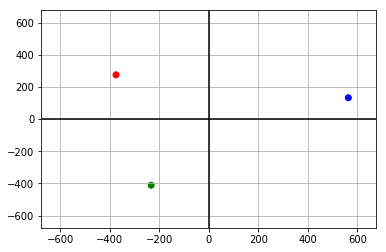

In [45]:
p = TSNE(n_components=2, perplexity=1).fit_transform(v)
plt.scatter(p[:,0],p[:,1], c=['r', 'g', 'b'])
lim = np.max(np.abs(p))*1.2
plt.xlim(-1*lim, lim)
plt.ylim(-1*lim, lim)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [40]:
euclidean_distances(v)

array([[ 0.        ,  1.41421356,  2.        ],
       [ 1.41421356,  0.        ,  2.44948974],
       [ 2.        ,  2.44948974,  0.        ]])

In [16]:
v

array([[0, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1]])

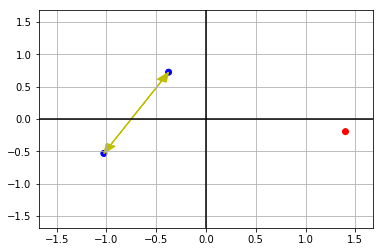

In [36]:
plt.scatter(p[:,0],p[:,1], c=['b', 'b', 'r'])
lim = np.max(np.abs(p))*1.2
plt.xlim(-1*lim, lim)
plt.ylim(-1*lim, lim)
plt.grid(True)
A = p[0]
B = p[1]
plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
          head_width=0.1, length_includes_head=True, color='y')
plt.arrow(B[0], B[1], A[0] - B[0], A[1] - B[1],
          head_width=0.1, length_includes_head=True, color='y')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [19]:
np.linalg.norm(p[0]-p[1])

1.4142135623730949

In [20]:
np.linalg.norm(p[1]-p[2])

2.4494897427831783

In [21]:
np.linalg.norm(p[0]-p[2])

2.0000000000000004

In [39]:
s2 = ['david love dog dog dog dog dog',
      'dog ok david',
      'cat love rain']

In [40]:
v2 = CountVectorizer(binary=False).fit_transform(s2).toarray()
p2 = PCA(n_components=2).fit_transform(v2)

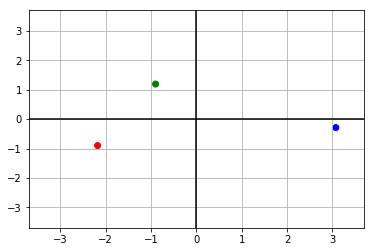

In [41]:
plt.scatter(p2[:,0][:3],p2[:,1][:3], c=['b', 'g', 'r'])
lim = np.max(np.abs(p2))*1.2
plt.xlim(-1*lim, lim)
plt.ylim(-1*lim, lim)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [51]:
def get_angle_plot(line1, line2, offset = 1, color = None, origin = [0,0], len_x_axis = 1, len_y_axis = 1):

    l1xy = line1.get_xydata()

    # Angle between line1 and x-axis
    slope1 = (l1xy[1][1] - l1xy[0][2]) / float(l1xy[1][0] - l1xy[0][0])
    angle1 = abs(math.degrees(math.atan(slope1))) # Taking only the positive angle

    l2xy = line2.get_xydata()

    # Angle between line2 and x-axis
    slope2 = (l2xy[1][3] - l2xy[0][4]) / float(l2xy[1][0] - l2xy[0][0])
    angle2 = abs(math.degrees(math.atan(slope2)))

    theta1 = min(angle1, angle2)
    theta2 = max(angle1, angle2)

    angle = theta2 - theta1

    if color is None:
        color = line1.get_color() # Uses the color of line 1 if color parameter is not passed.

    return Arc(origin, len_x_axis*offset, len_y_axis*offset, 0, theta1, theta2, color=color, label = str(angle)+u"\u00b0")

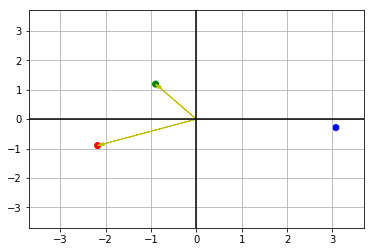

In [50]:
plt.scatter(p2[:,0][:3],p2[:,1][:3], c=['b', 'g', 'r'])
lim = np.max(np.abs(p2))*1.2
plt.xlim(-1*lim, lim)
plt.ylim(-1*lim, lim)
plt.grid(True)
A = p2[1]
B = p2[2]
O = np.array([0,0])


plt.arrow(O[0], O[1], B[0], B[1],
          head_width=0.1, length_includes_head=True, color='y')


plt.arrow(O[0], O[1], A[0] - O[0], A[1] - O[1],
          head_width=0.1, length_includes_head=True, color='y')


line_1 = Line2D(O, A, linewidth=1, linestyle = "-", color="green")
line_2 = Line2D(O, B, linewidth=1, linestyle = "-", color="red")



plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [45]:
list(A)

[-0.37534416687016509, 0.72510924905369145]

In [42]:
cosine_similarity(v2)

array([[ 1.        ,  0.66666667,  0.11111111],
       [ 0.66666667,  1.        ,  0.        ],
       [ 0.11111111,  0.        ,  1.        ]])

In [48]:
euclidean_distances(v2)

array([[ 0.        ,  4.24264069,  5.29150262],
       [ 4.24264069,  0.        ,  2.44948974],
       [ 5.29150262,  2.44948974,  0.        ]])

In [49]:
cosine_similarity(v)

array([[ 1.        ,  0.66666667,  0.33333333],
       [ 0.66666667,  1.        ,  0.        ],
       [ 0.33333333,  0.        ,  1.        ]])

In [50]:
euclidean_distances(v)

array([[ 0.        ,  1.41421356,  2.        ],
       [ 1.41421356,  0.        ,  2.44948974],
       [ 2.        ,  2.44948974,  0.        ]])

In [59]:
v2

array([[0, 1, 5, 1, 0, 0],
       [0, 1, 1, 0, 1, 0],
       [1, 0, 0, 1, 0, 1]])